In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.stats import probplot
from scipy.stats import kstest, chisquare # tests
from scipy.stats import gamma, beta, norm, lognorm # distributions
drive.mount('/content/drive')

Mounted at /content/drive


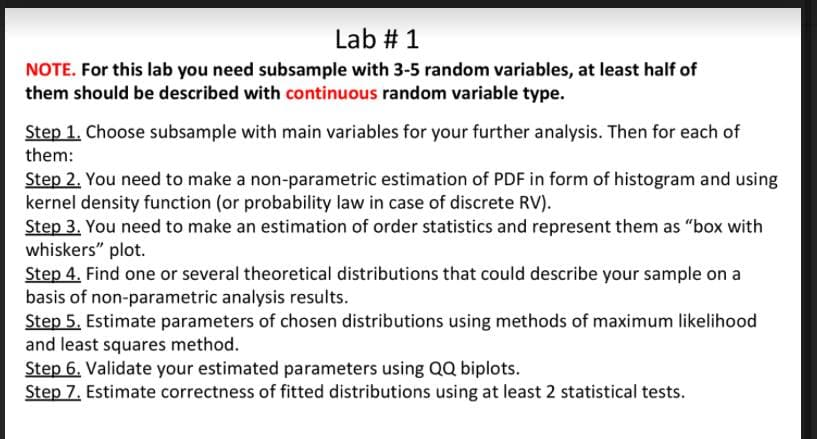

In [ ]:
%ls "/content/drive/MyDrive/MDALabs/lab1/data/train_timeseries/"

train_timeseries.csv


In [ ]:
# data = pd.read_csv("/content/drive/MyDrive/MDALabs/lab1/data/train_timeseries/train_timeseries.csv").sample(1_000_000)
data = pd.read_csv("/content/drive/MyDrive/train_timeseries-002.csv").sample(1_000_000)

# Новый раздел

In [ ]:
data.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2925542,13231,2001-09-24,14.84,98.58,13.38,19.56,18.21,18.21,21.72,14.39,7.34,19.51,1.73,2.91,0.69,2.22,3.35,5.52,1.36,4.17,NaN
10988372,35015,2007-11-22,1.22,89.63,2.93,0.33,-4.85,-4.80,2.45,-2.61,5.06,1.48,3.97,6.12,2.24,3.88,4.84,7.58,2.35,5.24,NaN
11334938,36063,2004-08-15,0.12,100.68,10.26,19.47,14.49,14.49,21.67,17.40,4.27,19.39,0.88,1.65,0.12,1.53,1.27,2.48,0.26,2.22,NaN
16431536,48313,2016-08-30,5.70,100.38,18.27,26.78,23.61,23.61,30.95,23.08,7.87,26.52,2.03,2.82,1.35,1.47,3.58,4.76,2.81,1.96,0.0
10351786,31093,2016-03-23,8.56,92.86,4.24,2.23,0.04,0.05,7.78,-2.08,9.86,2.50,13.42,15.07,8.41,6.67,16.41,18.68,10.89,7.79,NaN


In [ ]:
len(data)

1000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


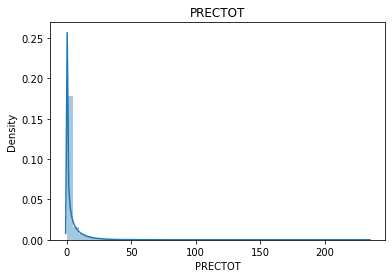

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


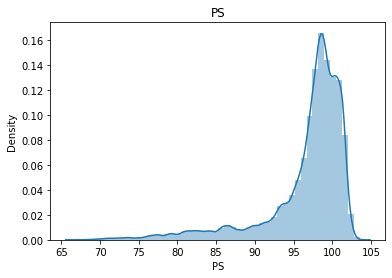

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


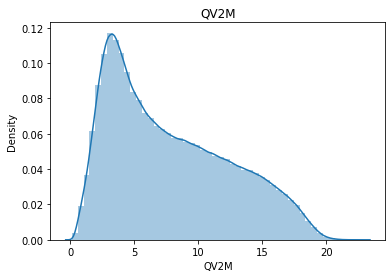

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


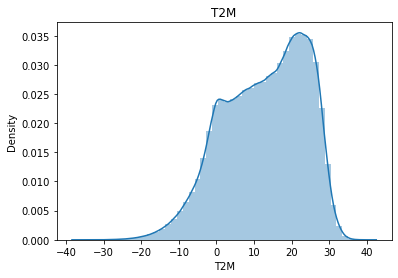

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


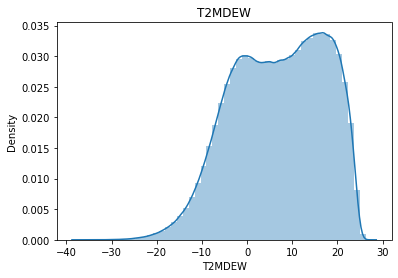

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


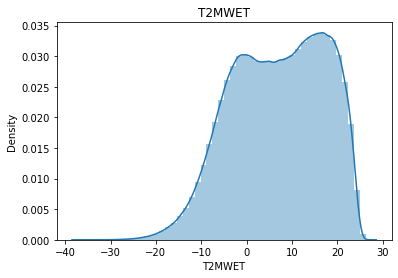

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


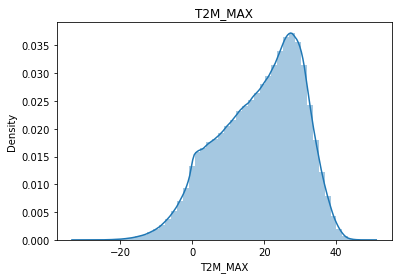

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


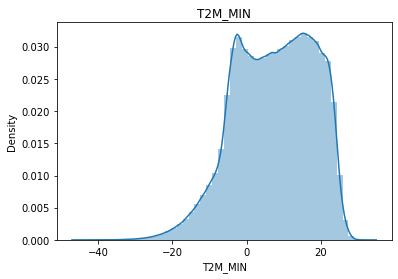

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


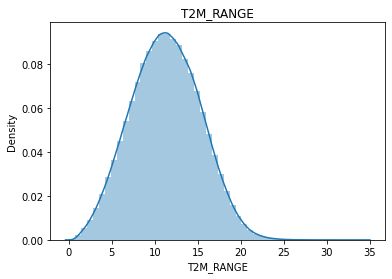

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


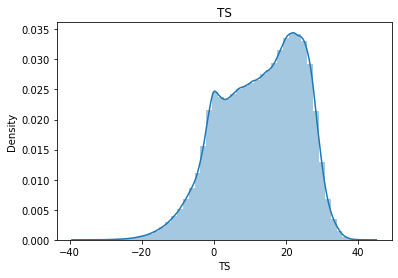

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


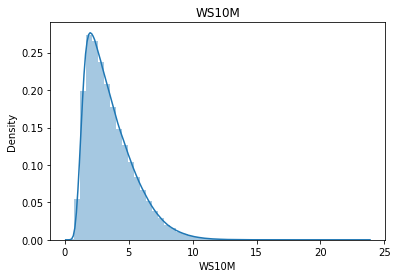

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


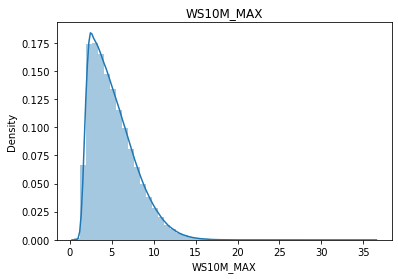

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


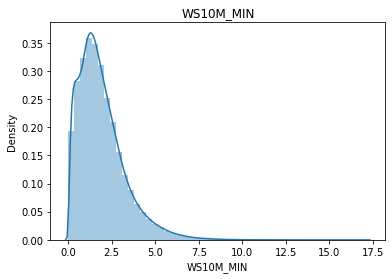

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


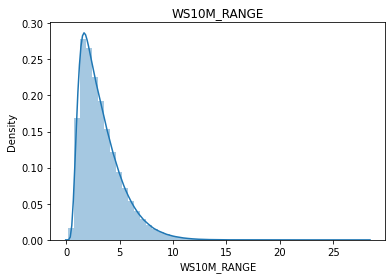

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


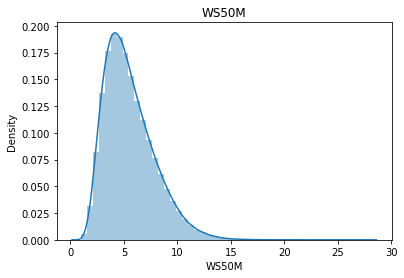

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


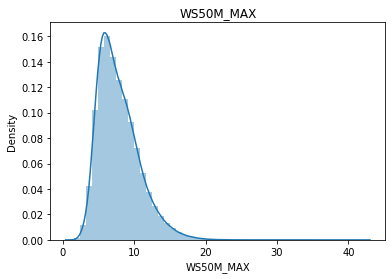

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


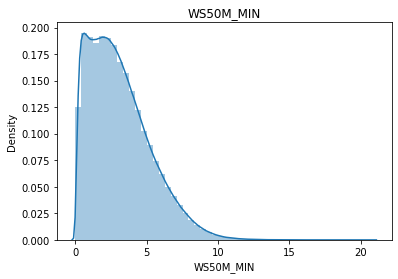

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


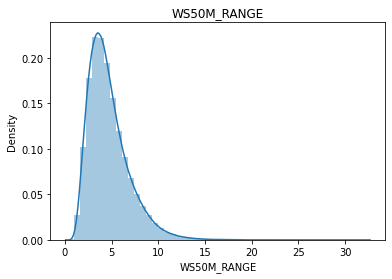

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


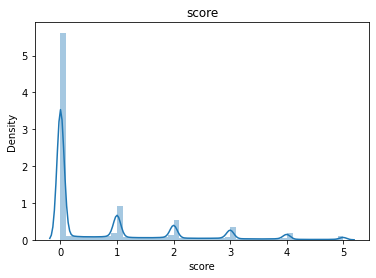

In [ ]:
for col in data.columns[2:]:
    sns.distplot(data[col])
    plt.title(col)
    plt.show()

In [ ]:
chosen_columns = ['PRECTOT', 'T2MDEW', 'T2M_RANGE', 'WS10M']

In [ ]:
from scipy import optimize
def delete_extreme_p(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    under_border, top_border = q1 - 1.5*iqr, q3 + 1.5*iqr
    data = data[data > under_border]
    data = data[data < top_border]
    return data

In [ ]:
def optim_distr(data, distr):
    def least_squares(x, y, pdf):
        return np.sum((pdf(x) - y)**2)
    
    data = delete_extreme_p(data)
    
    bins = 50
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_edges += (bin_edges[0] - bin_edges[1]) / 2
    bin_edges = bin_edges[1:]
    
    if distr == gamma:
        ab_init = (1, 1, 1)
    elif distr == lognorm:
        hist = hist[bin_edges > 0]
        bin_edges = bin_edges[bin_edges > 0]
        ab_init = (1, 1, 1)
    else:
        ab_init = (1, 1)
    optfun = lambda abc: least_squares(bin_edges, hist, distr(*abc).pdf)

    opt = optimize.minimize(optfun, ab_init, method="nelder-mead", 
                            options={'disp': True, 'maxiter': 2000})
    
    x = np.linspace(data.min(), data.max(), bins)
    #print(opt.x)
    
    #plt.figure(figsize=(10, 10))
    #plt.title(distr, fontsize=20)
    #plt.hist(data, bins, density=True, color='b', edgecolor='white', alpha=0.5)
    
    #plt.plot(x, distr(*opt.x).pdf(x), 'r', lw=1, alpha=1)
    #print("KStest - ", stats.kstest(data, distr(*opt.x).pdf(x)))
    #plt.show()
    # qq_plot(data, distr, sparams=opt.x, )
    
    return list(opt.x)

# data = df['T2M_RANGE'].to_numpy()
# optim_distr(data, stats.gamma)

In [ ]:
parameters = {key:{} for key in chosen_columns}

chosen_distributions = {'norm': norm, 
                        'lognorm': lognorm, 
                        'gamma': gamma, 
                        'beta': beta}

for col in tqdm(chosen_columns):
    print('-----------  ', col, '-----------')
    parameters[col] = {key:{} for key in chosen_distributions}
    for dist in chosen_distributions:
        y = data[col].to_numpy()
        opt = optim_distr(y, chosen_distributions[dist])
        parameters[col][dist] = opt

  0%|          | 0/4 [00:00<?, ?it/s]

-----------   PRECTOT -----------
Optimization terminated successfully.
         Current function value: 0.540474
         Iterations: 45
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.111130
         Iterations: 97
         Function evaluations: 180
Optimization terminated successfully.
         Current function value: 0.490887
         Iterations: 669
         Function evaluations: 1172
Optimization terminated successfully.
         Current function value: 0.459952
         Iterations: 59
         Function evaluations: 112
-----------   T2MDEW -----------
Optimization terminated successfully.
         Current function value: 0.001232
         Iterations: 85
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.017789
         Iterations: 139
         Function evaluations: 262
Optimization terminated successfully.
         Current function value: 0.024216
         Iteratio

In [ ]:
parameters = {'PRECTOT': {'beta': [0.5637421312099691, 12.206755635597045],
  'gamma': [0.9001402600482455, 0.05389999997122874, 2.317439537590622],
  'lognorm': [2.9040409072143323, 0.02620940533491877, 0.022948832852127104],
  'norm': [0.016918149499874344, 0.07006859173924922]},
 'T2MDEW': {'beta': [1.6226994470089335, 0.030758475344946475],
  'gamma': [0.07830811804819221, 0.40780104111719384, 1.7708014775091594],
  'lognorm': [2.5215596390685073, 0.4078011867421177, 0.030305230877783917],
  'norm': [8.284613339026278, 11.809327202515721]},
 'T2M_RANGE': {'beta': [2.3682972818329837, 0.00038053173582434696],
  'gamma': [0.0068528634972802194, 0.716426588090602, 2.3366114388948334],
  'lognorm': [7.011382123650852, 1.211717669971204, 4.917863769921563e-05],
  'norm': [11.224126370195242, 4.187016284192087]},
 'WS10M': {'beta': [0.0025047547459192817, 0.0039304756900820255],
  'gamma': [1.8799118648867053, 0.9124603808896647, 1.431332707619562],
  'lognorm': [0.6533936743918839, 0.410140640072043, 2.7227891964194844],
  'norm': [2.8970639269852647, 1.5838617183433013]}}


parameters

{'PRECTOT': {'beta': [0.5637421312099691, 12.206755635597045],
  'gamma': [0.9001402600482455, 0.05389999997122874, 2.317439537590622],
  'lognorm': [2.9040409072143323, 0.02620940533491877, 0.022948832852127104],
  'norm': [0.016918149499874344, 0.07006859173924922]},
 'T2MDEW': {'beta': [1.6226994470089335, 0.030758475344946475],
  'gamma': [0.07830811804819221, 0.40780104111719384, 1.7708014775091594],
  'lognorm': [2.5215596390685073, 0.4078011867421177, 0.030305230877783917],
  'norm': [8.284613339026278, 11.809327202515721]},
 'T2M_RANGE': {'beta': [2.3682972818329837, 0.00038053173582434696],
  'gamma': [0.0068528634972802194, 0.716426588090602, 2.3366114388948334],
  'lognorm': [7.011382123650852, 1.211717669971204, 4.917863769921563e-05],
  'norm': [11.224126370195242, 4.187016284192087]},
 'WS10M': {'beta': [0.0025047547459192817, 0.0039304756900820255],
  'gamma': [1.8799118648867053, 0.9124603808896647, 1.431332707619562],
  'lognorm': [0.6533936743918839, 0.410140640072043

In [ ]:
for col in chosen_columns:
    clean_data = delete_extreme_p(data[col])
    print(np.percentile(clean_data, [0, 25, 50, 75, 100]))

[0.   0.   0.07 0.77 5.37]
[-25.65  -0.94   7.59  15.52  26.56]
[ 0.07  8.42 11.24 14.07 22.57]
[0.36 2.12 3.09 4.47 8.26]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


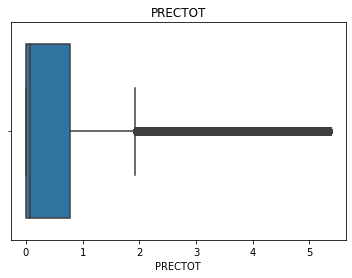

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


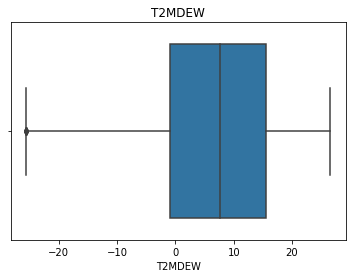

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


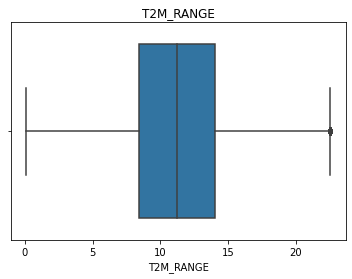

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


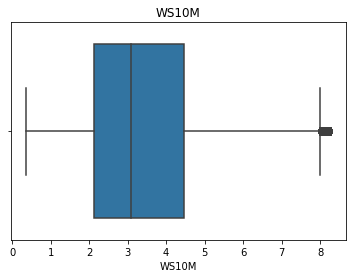

In [ ]:
for col in chosen_columns:
    clean_data = delete_extreme_p(data[col])
    sns.boxplot(clean_data)
    plt.title(col)
    plt.show()

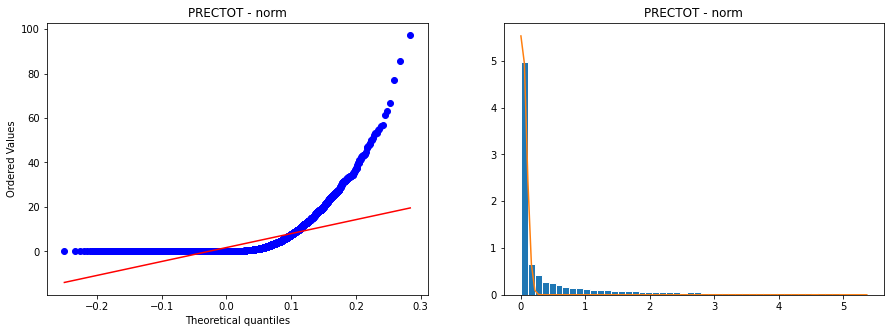

kstest : PRECTOT-norm: stat, pvalue = (0.4074821975082963, 0.0)
chisquare : PRECTOT-norm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


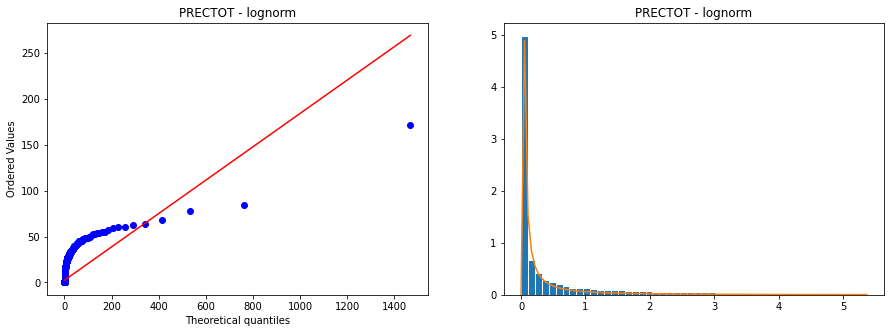

kstest : PRECTOT-lognorm: stat, pvalue = (0.4129615859763345, 0.0)
chisquare : PRECTOT-lognorm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


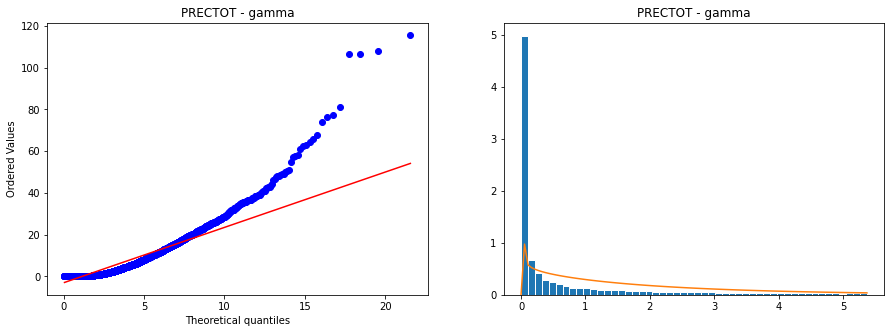

kstest : PRECTOT-gamma: stat, pvalue = (0.5164414226508984, 0.0)
chisquare : PRECTOT-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


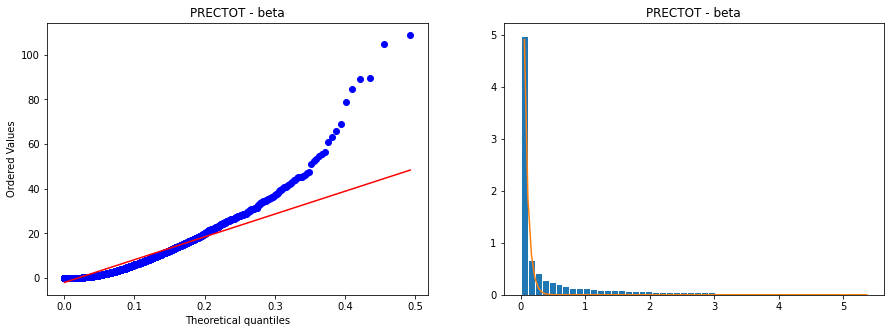

kstest : PRECTOT-beta: stat, pvalue = (0.3806852853941318, 0.0)
chisquare : PRECTOT-beta: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


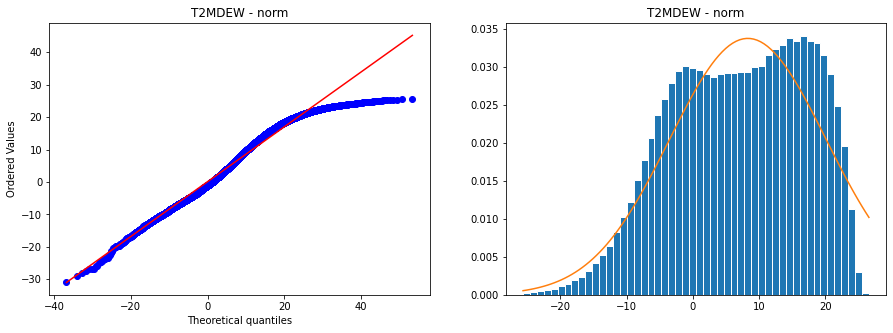

kstest : T2MDEW-norm: stat, pvalue = (0.08504488909295926, 0.0)
chisquare : T2MDEW-norm: stat, pvalue = (377362.40347429673, 0.0)


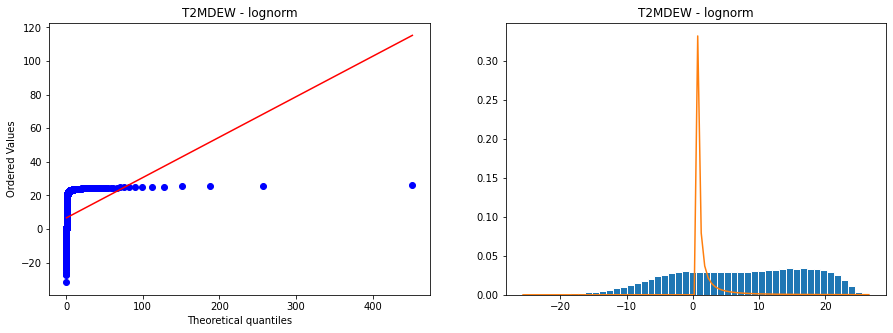

kstest : T2MDEW-lognorm: stat, pvalue = (0.6047749661512262, 0.0)
chisquare : T2MDEW-lognorm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


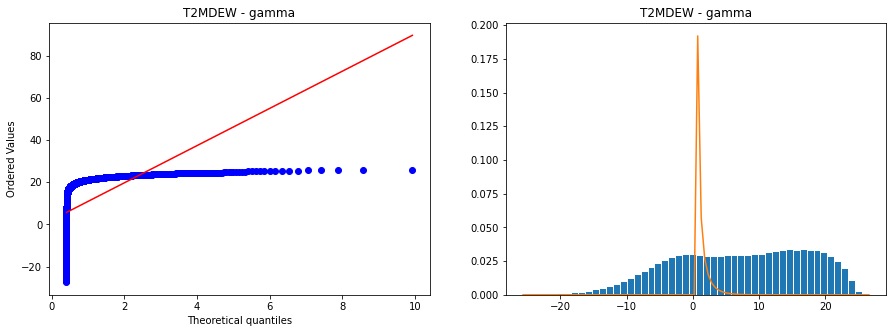

kstest : T2MDEW-gamma: stat, pvalue = (0.6422039132441598, 0.0)
chisquare : T2MDEW-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


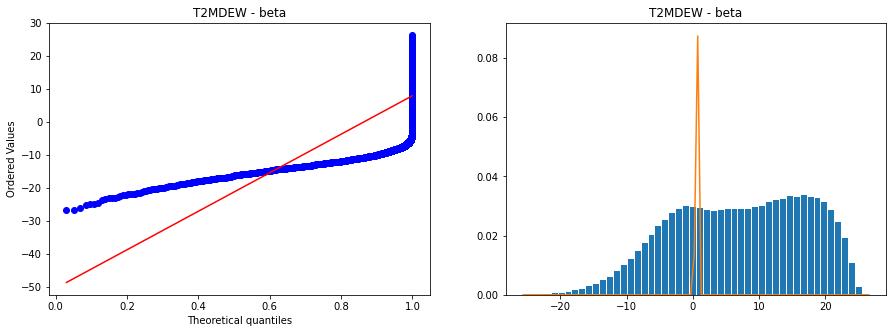

kstest : T2MDEW-beta: stat, pvalue = (0.6920332770446015, 0.0)
chisquare : T2MDEW-beta: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


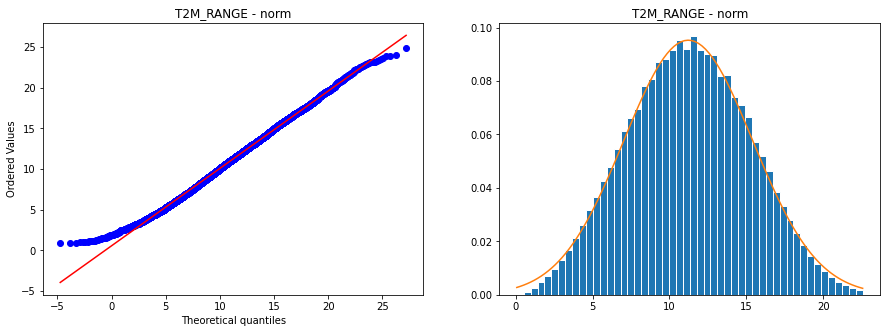

kstest : T2M_RANGE-norm: stat, pvalue = (0.01093644353645868, 4.17579187817464e-104)
chisquare : T2M_RANGE-norm: stat, pvalue = (2595536.5942032295, 0.0)


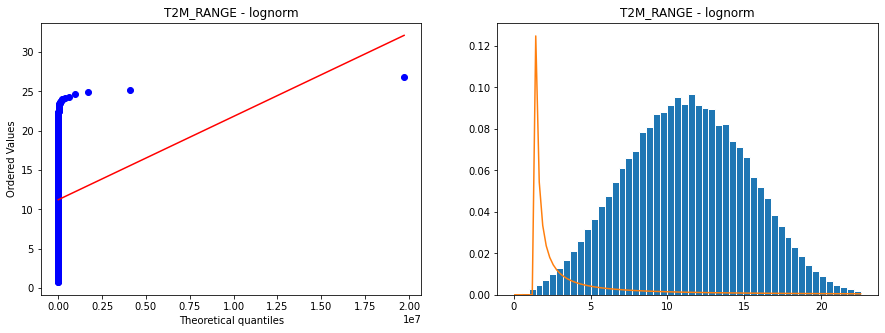

kstest : T2M_RANGE-lognorm: stat, pvalue = (0.9189984321621757, 0.0)
chisquare : T2M_RANGE-lognorm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


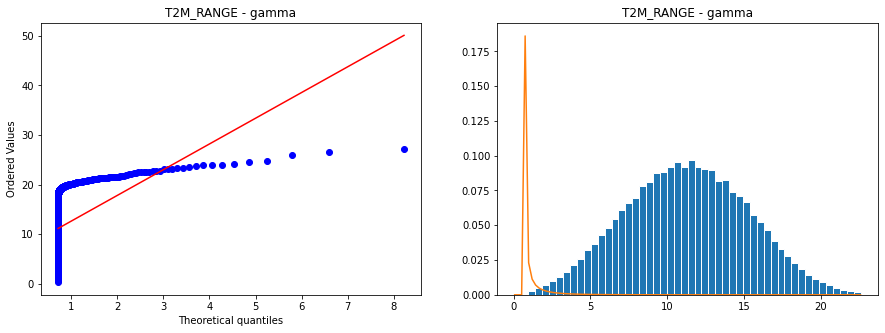

kstest : T2M_RANGE-gamma: stat, pvalue = (0.9926228770133428, 0.0)
chisquare : T2M_RANGE-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


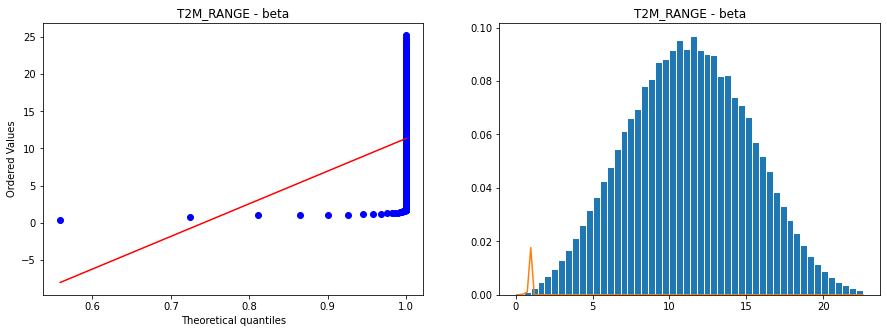

kstest : T2M_RANGE-beta: stat, pvalue = (0.9994979949859619, 0.0)
chisquare : T2M_RANGE-beta: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


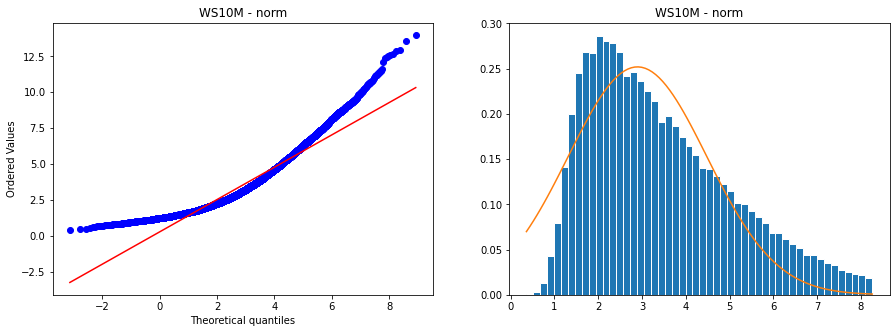

kstest : WS10M-norm: stat, pvalue = (0.11430907332531579, 0.0)
chisquare : WS10M-norm: stat, pvalue = (9771417.669720404, 0.0)


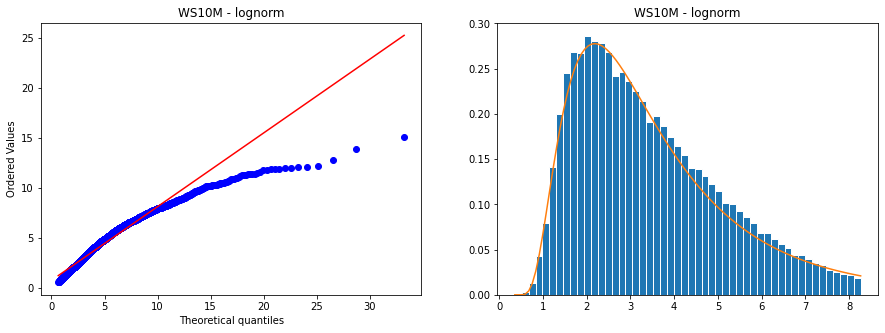

kstest : WS10M-lognorm: stat, pvalue = (0.053986417005814746, 0.0)
chisquare : WS10M-lognorm: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


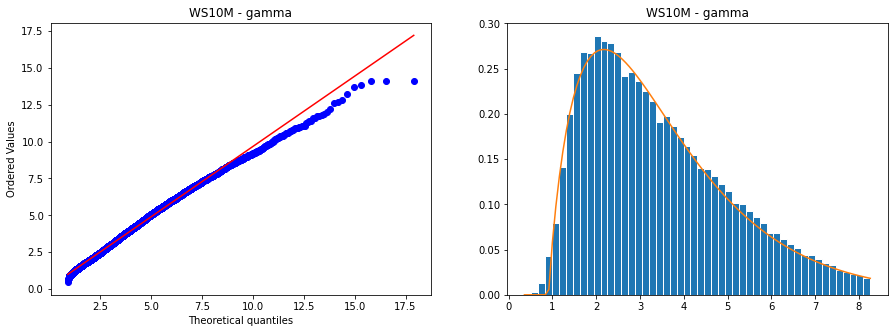

kstest : WS10M-gamma: stat, pvalue = (0.03050884817898325, 0.0)
chisquare : WS10M-gamma: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


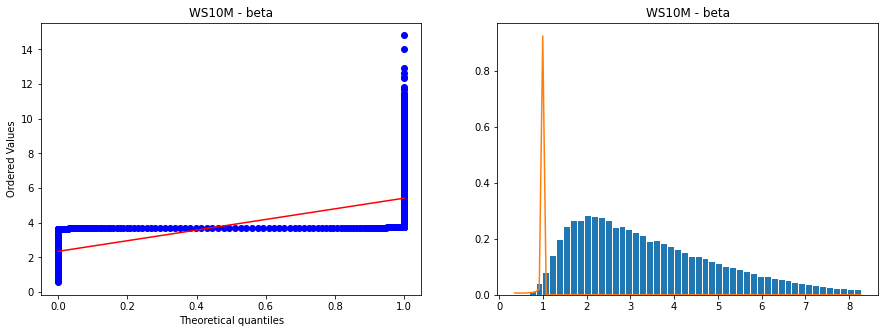

kstest : WS10M-beta: stat, pvalue = (0.9906297353959239, 0.0)
chisquare : WS10M-beta: stat, pvalue = (inf, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


In [ ]:
dof = 100


for col in chosen_columns:
    for dist in chosen_distributions:
        clean_data = delete_extreme_p(data[col])
        data_dist, _ = np.histogram(clean_data, bins=100)

        plt.figure(figsize=(15, 5))

        ax = plt.subplot(121)
        probplot(data.sample(10000)[col], sparams=tuple(parameters[col][dist]), dist=dist, plot=ax)
        ax.set_title('{} - {}'.format(col, dist))

        plt.subplot(122)
        
        pdf = chosen_distributions[dist](*parameters[col][dist]).pdf
        cdf = chosen_distributions[dist](*parameters[col][dist]).cdf
        stat, pvalue = kstest(clean_data, cdf)

        x = np.linspace(clean_data.min(), clean_data.max(), dof)
        y = pdf(x)

        plt.title('{} - {}'.format(col, dist))
        plt.hist(clean_data, bins=50 , density=True, edgecolor='w')
        plt.plot(x, y)

        plt.show()


        print('kstest : {}-{}: stat, pvalue = ({}, {})'.format(col, dist, stat, pvalue))

        cdf = cdf(x)
        exp_entries = (pdf(x) * len(clean_data)).astype(np.int)
        stat, pvalue = chisquare(data_dist, exp_entries)
        print('chisquare : {}-{}: stat, pvalue = ({}, {})'.format(col, dist, stat, pvalue))


In [ ]:
data_dist, _ = np.histogram(clean_data, bins=50)
print(data_dist.shape, (pdf(x) * len(clean_data)).astype(np.int).shape)

(50,) (100,)


In [ ]:
data_dist.shape

(50,)

In [ ]:
for col in chosen_columns:
    for dist in chosen_distributions:
        _, ax = plt.subplots(1, 1)
        probplot(delete_extreme_p(data.sample(10000)[col]), sparams=tuple(parameters[col][dist]), dist=dist, plot=ax)
        ax.set_title(f'{col} {dist}')
        plt.plot()


# Тесты 
(пункт 7)

In [ ]:
dof = int(np.ceil(2*len(data)**(1.0/3.0)))
print(dof)

kstest_res = {key:{} for key in chosen_columns}
chisquare_res = {key:{} for key in chosen_columns}

chosen_distributions = {'norm': norm, 
                        'lognorm':lognorm, 
                        'gamma': gamma, 
                        'beta': beta}

for col in tqdm(chosen_columns, leave=False):
    data_dist, _ = np.histogram(data[col], bins=dof)

    # generate four pdfs with the parameters obtained in the step 5
    x = np.linspace(data[col].min(), data[col].max(), dof)

    for dist_name in  tqdm(chosen_distributions, leave=False):
        rv = chosen_distributions[dist_name](*parameters[col][dist_name])
        cdf = rv.cdf(x)
        # print(pdf.shape, data_dist.shape)
        stat, pvalue = kstest(data[col], rv.cdf)
        kstest_res[col][dist_name] = {'stat':stat, 'pvalue':pvalue}


        exp_entries = np.round(len(data[col]) * (cdf[1:] - cdf[:-1]))
        exp_entries = np.append(exp_entries, 0)
        mask = exp_entries > 4
        stat, pvalue = chisquare(data_dist[mask], exp_entries[mask])

        chisquare_res[col][dist_name] = {'stat':stat, 'pvalue':pvalue}

        # print(col, dist_name)
    

537


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
kstest_res, chisquare_res

({'PRECTOT': {'beta': {'pvalue': 0.0, 'stat': 0.4663267726843885},
   'gamma': {'pvalue': 0.0, 'stat': 0.4307067641099891},
   'lognorm': {'pvalue': 0.0, 'stat': 0.3531909756547438},
   'norm': {'pvalue': 0.0, 'stat': 0.491455729042607}},
  'T2MDEW': {'beta': {'pvalue': 0.0, 'stat': 0.6914710777029618},
   'gamma': {'pvalue': 0.0, 'stat': 0.641440021825087},
   'lognorm': {'pvalue': 0.0, 'stat': 0.6039138693748549},
   'norm': {'pvalue': 0.0, 'stat': 0.08497879589872803}},
  'T2M_RANGE': {'beta': {'pvalue': 0.0, 'stat': 0.9995029190681365},
   'gamma': {'pvalue': 0.0, 'stat': 0.9926305548756955},
   'lognorm': {'pvalue': 0.0, 'stat': 0.9191192164950268},
   'norm': {'pvalue': 0.0, 'stat': 0.010870532511429557}},
  'WS10M': {'beta': {'pvalue': 0.0, 'stat': 0.9910395385033066},
   'gamma': {'pvalue': 0.0, 'stat': 0.008842646018025813},
   'lognorm': {'pvalue': 0.0, 'stat': 0.03213102653612965},
   'norm': {'pvalue': 0.0, 'stat': 0.11528363877594289}}},
 {'PRECTOT': {'beta': {'pvalue': 0.

In [ ]:
dof = int(np.ceil(2*len(data)**(1.0/3.0)))
print(dof)

kstest_res = {key:{} for key in chosen_columns}
chisquare_res = {key:{} for key in chosen_columns}

chosen_distributions = {'norm': norm, 
                        'lognorm':lognorm, 
                        'gamma': gamma, 
                        'beta': beta}

for col in tqdm(chosen_columns, leave=False):
    data_col = delete_extreme_p(data[col])
    data_dist, _ = np.histogram(data_col, bins=dof)

    # generate four pdfs with the parameters obtained in the step 5
    x = np.linspace(data_col.min(), data_col.max(), dof)

    for dist_name in  tqdm(chosen_distributions, leave=False):
        rv = chosen_distributions[dist_name](*parameters[col][dist_name])
        cdf = rv.cdf(x)
        # print(pdf.shape, data_dist.shape)
        stat, pvalue = kstest(data_col, rv.cdf)
        kstest_res[col][dist_name] = {'stat':stat, 'pvalue':pvalue}

        exp_entries = np.round(len(data_col) * (cdf[1:] - cdf[:-1]))
        exp_entries = np.append(exp_entries, 0)
        mask = exp_entries > 4
        stat, pvalue = chisquare(data_dist[mask], exp_entries[mask])

        chisquare_res[col][dist_name] = {'stat':stat, 'pvalue':pvalue}

        # print(col, dist_name)
    

200


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
kstest_res, chisquare_res

({'PRECTOT': {'beta': {'pvalue': 0.0, 'stat': 0.38049920862529274},
   'gamma': {'pvalue': 0.0, 'stat': 0.5164639143190612},
   'lognorm': {'pvalue': 0.0, 'stat': 0.41385060221790304},
   'norm': {'pvalue': 0.0, 'stat': 0.40739045495598036}},
  'T2MDEW': {'beta': {'pvalue': 0.0, 'stat': 0.6919426158986774},
   'gamma': {'pvalue': 0.0, 'stat': 0.6419979506522897},
   'lognorm': {'pvalue': 0.0, 'stat': 0.6046207288899139},
   'norm': {'pvalue': 0.0, 'stat': 0.08532436089760964}},
  'T2M_RANGE': {'beta': {'pvalue': 0.0, 'stat': 0.9995160437023558},
   'gamma': {'pvalue': 0.0, 'stat': 0.9926663797094659},
   'lognorm': {'pvalue': 0.0, 'stat': 0.919052440180855},
   'norm': {'pvalue': 3.6297355917418303e-100, 'stat': 0.010726537378801183}},
  'WS10M': {'beta': {'pvalue': 0.0, 'stat': 0.9909546310223639},
   'gamma': {'pvalue': 0.0, 'stat': 0.03030795751993509},
   'lognorm': {'pvalue': 0.0, 'stat': 0.053692246612260575},
   'norm': {'pvalue': 0.0, 'stat': 0.11449577879205242}}},
 {'PRECTOT'